## 💾 The data ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

In [1]:
#import necessary modules
%matplotlib inline
import pandas as pd
from scipy.stats.stats import pearsonr
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the people's data
people = pd.read_csv('data/people.csv')
people

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0
...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006


In [3]:
#read the internet's data
internet = pd.read_csv('data/internet.csv')
internet

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [4]:
#read the broadband's data
broadband = pd.read_csv('data/broadband.csv')
broadband

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804
...,...,...,...,...
3883,Zimbabwe,ZWE,2016,1.217633
3884,Zimbabwe,ZWE,2017,1.315694
3885,Zimbabwe,ZWE,2018,1.406322
3886,Zimbabwe,ZWE,2019,1.395818


In [5]:
#define list of DataFrames
dfs = [people, internet, broadband]

#merge the DataFrames
df = reduce(lambda left,right: pd.merge(left,right,on=['Entity', 'Code', 'Year'],how='outer'), dfs)

#view merged DataFrame
display(df.head(15))
df.info()

,Entity,Code,Year,Users,Internet_Usage,Broadband_Subscriptions
0,Afghanistan,AFG,1990,0.0,0.000000,NaN
1,Afghanistan,AFG,1991,0.0,0.000000,NaN
2,Afghanistan,AFG,1992,0.0,0.000000,NaN
3,Afghanistan,AFG,1993,0.0,0.000000,NaN
4,Afghanistan,AFG,1994,0.0,0.000000,NaN
5,Afghanistan,AFG,1995,0.0,0.000000,NaN
6,Afghanistan,AFG,2001,930.0,0.004723,NaN
7,Afghanistan,AFG,2002,958.0,0.004561,NaN
8,Afghanistan,AFG,2003,19903.0,0.087891,NaN
9,Afghanistan,AFG,2004,24922.0,0.105809,0.000809


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8008 entries, 0 to 8007
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   8008 non-null   object 
 1   Code                     6284 non-null   object 
 2   Year                     8008 non-null   int64  
 3   Users                    6379 non-null   float64
 4   Internet_Usage           7089 non-null   float64
 5   Broadband_Subscriptions  3888 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 437.9+ KB


There are null-values in the data, and filling the null-values with zero instead of dropping them, will avoid an empty DataFrame in further exploration of the data.

In [6]:
#fill null-values with zero
new_df = df.fillna(0)

#inspect to confirm the above
display(new_df.isna().any())

Entity                     False
Code                       False
Year                       False
Users                      False
Internet_Usage             False
Broadband_Subscriptions    False
dtype: bool

In [7]:
#view the unique Entity column
display(new_df.Entity.unique())

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'Faeroe Islands', 'Fiji', 'F

In [8]:
#separate country, region and groups from Entity based on Google Search
country = new_df.loc[new_df['Entity'].isin(['Afghanistan', 'Albania', 'Algeria','American Samoa', 'Andorra', 'Angola',
                                        'Antigua and Barbuda','Argentina', 'Armenia', 'Aruba', 'Australia',
                                        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh','Barbados',
                                        'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda','Bhutan', 'Bolivia',
                                        'Bosnia and Herzegovina', 'Botswana','Brazil', 'Brunei', 'Bulgaria','Burkina Faso',
                                        'Burundi', 'Cambodia', 'Cameroon', 'Canada','Cape Verde', 'Central African Republic',
                                        'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo','Costa Rica', "Cote d'Ivoire",
                                        'Croatia', 'Cuba', 'Curacao','Cyprus', 'Czechia', 'Democratic Republic of Congo',
                                        'Denmark','Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
                                        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia','Eswatini', 'Ethiopia', 
                                        'Faeroe Islands', 'Fiji', 'Finland','France','French Polynesia', 'Gabon', 'Gambia',
                                        'Georgia', 'Germany','Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
                                        'Guatemala','Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti','Honduras', 'Hungary',
                                        'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland','Israel', 'Italy', 'Jamaica',
                                        'Japan', 'Jordan', 'Kazakhstan','Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan',
                                        'Laos','Latvia', 'Lebanon','Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
                                        'Luxembourg','Madagascar', 'Malawi', 'Malaysia','Maldives', 'Mali', 'Malta',
                                        'Marshall Islands', 'Mauritania','Mauritius', 'Mexico', 'Micronesia (country)',
                                        'Moldova', 'Monaco', 'Mongolia', 'Montenegro','Morocco', 'Mozambique', 'Myanmar',
                                        'Namibia', 'Nauru', 'Nepal','Netherlands', 'New Zealand', 'Nicaragua','Niger',
                                        'Nigeria', 'North Korea','North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau',
                                        'Panama','Papua New Guinea', 'Paraguay', 'Peru', 'Philippines','Poland', 'Portugal',
                                        'Qatar', 'Romania','Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia',
                                        'Saint Vincent and the Grenadines', 'Samoa', 'San Marino','Sao Tome and Principe',
                                        'Saudi Arabia', 'Senegal', 'Serbia','Seychelles', 'Sierra Leone', 'Singapore',
                                        'Slovakia', 'Slovenia','Solomon Islands', 'Somalia', 'South Africa','South Korea',
                                        'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname','Sweden', 'Switzerland',
                                        'Syria', 'Tajikistan', 'Tanzania','Thailand', 'Timor', 'Togo', 'Tonga',
                                        'Trinidad and Tobago','Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda',
                                        'Ukraine', 'United Arab Emirates','United Kingdom', 'United States', 'Uruguay',
                                        'Uzbekistan', 'Vanuatu','Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'])]
region = new_df.loc[new_df['Entity'].isin(['Africa Eastern and Southern', 'Africa Western and Central', 'Arab World',
                                       'British Virgin Islands', 'Cayman Islands','Central Europe and the Baltics',
                                       'East Asia & Pacific','Europe & Central Asia', 'European Union', 'Guam', 'Hong Kong',
                                       'Latin America & Caribbean', 'Macao', 'Middle East & North Africa','New Caledonia',
                                       'North America', 'Northern Mariana Islands','Palestine', 'Puerto Rico','South Asia',
                                       'Sub-Saharan Africa', 'Turks and Caicos Islands'])]
groups = new_df.loc[new_df['Entity'].isin(['Caribbean Small States', 'Early-demographic dividend',
                                       'East Asia & Pacific (IDA & IBRD)','East Asia & Pacific (excluding high income)',
                                       'Euro area', 'Europe & Central Asia (IDA & IBRD)',
                                       'Europe & Central Asia (excluding high income)',
                                       'Fragile and conflict affected situations','Heavily indebted poor countries (HIPC)',
                                       'High income','IBRD only','IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
                                       'Late-demographic dividend', 'Latin America & Caribbean (IDA & IBRD)',
                                       'Latin America & Caribbean (excluding high income)',
                                       'Least developed countries: UN classification','Low & middle income', 'Low income',
                                       'Lower middle income','Middle East & North Africa (IDA & IBRD)',
                                       'Middle East & North Africa (excluding high income)','Middle income', 'OECD members',
                                       'Other small states','Pacific island small states', 'Post-demographic dividend',
                                       'Pre-demographic dividend', 'Small states', 'South Asia (IDA & IBRD)',
                                       'Sub-Saharan Africa (IDA & IBRD)','Sub-Saharan Africa (excluding high income)',
                                       'United States Virgin Islands','Upper middle income', 'World'])]

In [9]:
#the top 5 countries with the highest internet use (by population share)
display(country.groupby('Entity')['Internet_Usage'].max().nlargest(5))

#the number of people that had internet access in those countries in 2019
new_df_2019 = country[country.Year==2019]      #--filter for Year 2019
new_df_2019.groupby(['Entity', 'Users'])['Internet_Usage'].max().nlargest(4).reset_index().Users.sum()

Entity
Bahrain                 99.701504
Qatar                   99.652849
Kuwait                  99.598850
Liechtenstein           99.546612
United Arab Emirates    99.149998
Name: Internet_Usage, dtype: float64

17841386.0

In [10]:
#the top 5 countries with the highest internet use for each of the following regions: 
#'Africa Eastern and Southern';
aes = country.loc[country['Entity'].isin(['Malawi', 'Madagascar', 'Kenya', 'Zimbabwe', 'Ethiopia', 'Burundi', 'Comoros',
                                          'Mozambique', 'Zambia', 'Tanzania', 'Uganda', 'Mauritius', 'Rwanda', 'Swaziland',
                                          'Angola', 'Eriteria', 'South Africa', 'Lesotho', 'Somalia','Seychelles', 'Botswana',
                                          'Namibia', 'Djibouti'])]

#'Africa Western and Central';
awc = country.loc[country['Entity'].isin(['Democratic Republic of Congo', 'Cameroon', 'Central African Republic', 'Chad',
                                          'Gabon', 'Equatorial Guinea', 'Sao Tome and Principe', 'Benin', 'Burkina Faso',
                                          'Cape Verde', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali',
                                          'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'])]

#'Latin America & Caribbean';
lac = country.loc[country['Entity'].isin(['Brazil', 'Mexico', 'Colombia', 'Argentina', 'Peru', 'Curacao', 'Venezuela', 'Chile',
                                          'Guatemala', 'Ecuador', 'Bolivia', 'Haiti', 'Cuba', 'Dominican Republic', 'Honduras',
                                          'Paraguay', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Uruguay', 'Jamaica',
                                          'Trinidad and Tobago', 'Guyana', 'Suriname', 'Belize', 'Bahamas', 'Barbados',
                                          'Saint Lucia', 'Grenada', 'Antigua and Barbuda', 'Dominica', 'Saint Kitts and Nevis',
                                          'St. Vincent & Grenadines'])]

#'East Asia & Pacific';
eap = country.loc[country['Entity'].isin(['Cambodia', 'China', 'Fiji', 'Indonesia', 'Japan', 'Kiribati', 'Mongolia', 'Myanmar',
                                          'New Caledonia', 'New Zealand', 'Palau', 'Philippines', 'Samoa', 'Thailand', 'Tonga',
                                          'Tuvalu', 'Vanuatu', 'Vietnam', 'Micronesia (country)', 'Papua New Guinea', 'Timor',
                                          'Solomon Islands', 'Marshall Islands', 'Laos'])]

#'South Asia';
sa = country.loc[country['Entity'].isin(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal',
                                         'Pakistan', 'Sri Lanka'])]

#'North America';
na = country.loc[country['Entity'].isin(['Antigua and Barbuda', 'Bahamas', 'United States', 'Mexico', 'Canada', 'Guatemala',
                                         'Cuba', 'Haiti', 'Dominican Republic', 'Honduras', 'Nicaragua', 'El Salvador',
                                         'Costa Rica', 'Panama', 'Jamaica', 'Trinidad and Tobago', 'Belize', 'Barbados',
                                         'Saint Lucia', 'Grenada', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines',
                                         'Dominica'])]

#'European Union';
eu = country.loc[country['Entity'].isin(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
                                         'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
                                         'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
                                         'Slovakia', 'Spain', 'Sweden'])]

aes_top5 = aes.groupby('Entity')['Internet_Usage'].max().nlargest(5).reset_index()
display(aes_top5)

awc_top5 = awc.groupby('Entity')['Internet_Usage'].max().nlargest(5).reset_index()
display(awc_top5)

lac_top5 = lac.groupby('Entity')['Internet_Usage'].max().nlargest(5).reset_index()
display(lac_top5)

eap_top5 = eap.groupby('Entity')['Internet_Usage'].max().nlargest(5).reset_index()
display(eap_top5)

sa_top5 = sa.groupby('Entity')['Internet_Usage'].max().nlargest(5).reset_index()
display(sa_top5)

na_top5 = na.groupby('Entity')['Internet_Usage'].max().nlargest(5).reset_index()
display(na_top5)

eu_top5 = eu.groupby('Entity')['Internet_Usage'].max().nlargest(5).reset_index()
display(eu_top5)

,Entity,Internet_Usage
0,Mauritius,63.999898
1,Seychelles,58.769811
2,South Africa,56.167394
3,Djibouti,55.681409
4,Botswana,41.413795


,Entity,Internet_Usage
0,Cape Verde,57.162146
1,Gabon,50.320120
2,Ghana,37.884153
3,Nigeria,36.000000
4,Liberia,33.000000


,Entity,Internet_Usage
0,Bahamas,85.000000
1,Chile,83.558586
2,Barbados,81.760778
3,Costa Rica,81.202596
4,Saint Kitts and Nevis,80.710191


,Entity,Internet_Usage
0,Japan,93.182721
1,New Zealand,90.811093
2,Vietnam,69.847929
3,Thailand,66.652413
4,Philippines,60.054760


,Entity,Internet_Usage
0,Iran,70.004552
1,Maldives,63.185666
2,Bhutan,41.772645
3,Sri Lanka,34.113348
4,India,32.000000


,Entity,Internet_Usage
0,Canada,92.701372
1,United States,88.498903
2,Bahamas,85.000000
3,Barbados,81.760778
4,Costa Rica,81.202596


,Entity,Internet_Usage
0,Luxembourg,98.136699
1,Denmark,98.046435
2,Sweden,94.783600
3,Netherlands,93.956400
4,Finland,91.514400


,Entity,Internet_Usage
0,North America,88.498903
1,European Union,85.429123
2,Latin America & Caribbean,65.897182
3,East Asia & Pacific,54.925229
4,South Asia,29.503040


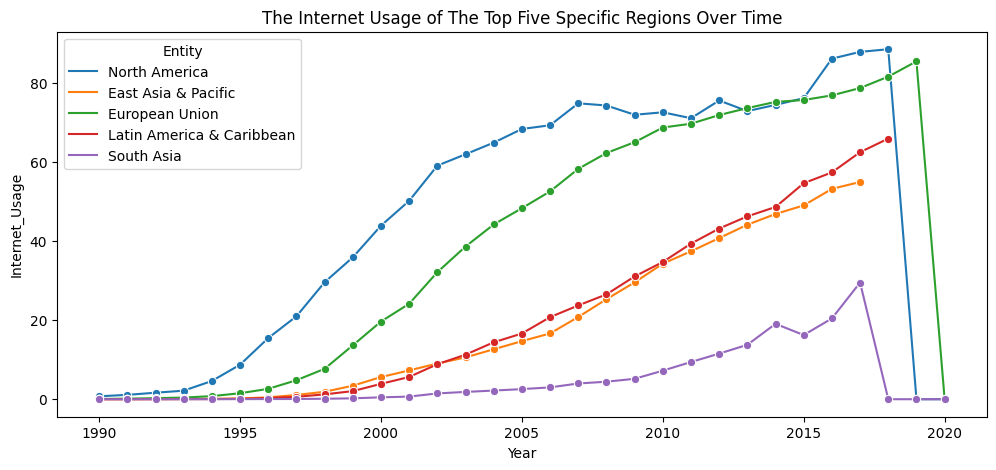

In [11]:
#the top 5 regions with the highest internet use among the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?

#filter for the specific regions stated above, and find the top five out of the specific regions
specific_regions_top5 = region.loc[region['Entity'].isin(['Africa Eastern and Southern', 'Africa Western and Central',
                                        'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America',
                                        'European Union'])]\
.groupby('Entity')['Internet_Usage'].max().nlargest(5).reset_index()

#view the top five out of the regions earlier stated
display(specific_regions_top5)

#a visualization for those five regions' internet usage over time.
data = region.loc[region['Entity'].isin(specific_regions_top5.Entity)]      
plt.figure(figsize=(12, 5))          #-- set figure size
sns.lineplot(x='Year', y='Internet_Usage', hue='Entity', data=data, marker='o')          #--lineplot
plt.title('The Internet Usage of The Top Five Specific Regions Over Time');      #--set title

From the visualization above, in the 1990s, the internet usage between the regions were very close. In 2002, East Asia & Pacific and Latin America & Carribean had the same amount of internet usage, likewise in 2014, North America and European Union had the same amount of internet usage. There is no data available for the regions in 2020.

In [12]:
#the 5 countries with the most internet users
country.groupby('Entity')['Users'].agg('max').nlargest(5)

Entity
China            1.003219e+09
India            6.004464e+08
United States    3.053713e+08
Brazil           1.734196e+08
Indonesia        1.460598e+08
Name: Users, dtype: float64

In [13]:
#the correlation between internet usage (population share) and broadband subscriptions for 2019
#first, get the correlation value and pvalue
display(pearsonr(new_df_2019.Internet_Usage, new_df_2019.Broadband_Subscriptions))

PearsonRResult(statistic=0.4725432059773369, pvalue=3.064269787197021e-12)

From the PearsonRResult, there exist a moderate positive correlation between 'Internet Usage' and 'Broadband Subscriptions' in 2019. Also, the pvalue indicates a statistically significant correlation between the two variables, as the it is lesser than 0.05

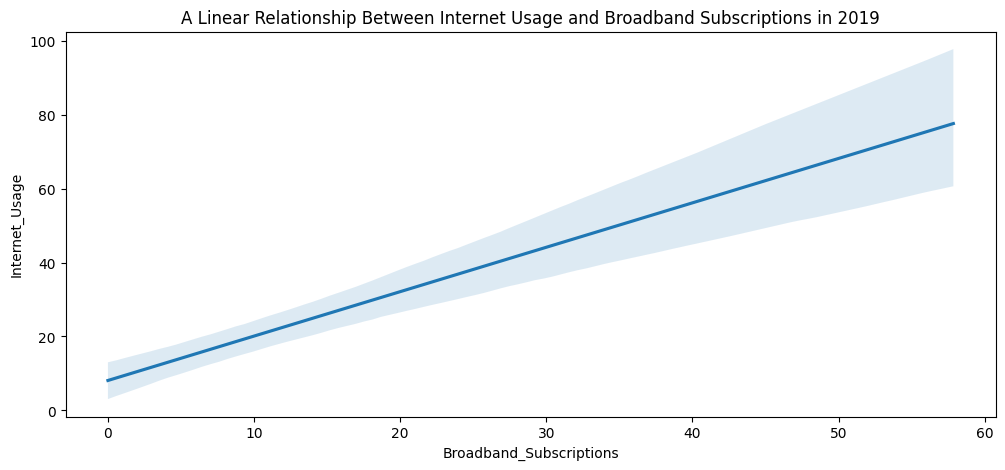

In [14]:
#a linear regression plot to further visualize the relationship between 'Internet Usage' and 'Broadband Subscriptions' in 2019
plt.figure(figsize=(12, 5))          #-- set figure size
sns.regplot(x = 'Broadband_Subscriptions', y = 'Internet_Usage', data = new_df_2019, scatter=False)          #--regplot
plt.title('A Linear Relationship Between Internet Usage and Broadband Subscriptions in 2019');          #--set title

A moderate positive linear correlation indeed!!

## Summary

- The top five countries with the highest internet use by population share, in ascending order are: Bahrain, Qatar, Kuwait, Liechtenstein, and United Arab Emirates.

- Seventeen million, eight hundred and forty-one thousand, three hundred and eighty-six (17841386) people had internet access in the above listed countries in 2019.

- The top 5 countries with the highest internet use for each of these regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union' are as follows: 
<br>
For the African Eastern and Southern region, in ascending order, the top five countries are Mauritius, Seychelles, South Africa, Djibouti and Botswana; 
<br>
For the Africa Western and Central region, in ascending order, the top five countries are Cape Verde, Gabon, Ghana, Nigeria and Liberia; 
<br>
For the Latin America & Caribbean region, in ascending order, the top five countries are Bahamas, Chile, Barbados, Costa Rica and, Saint Kitts and Nevis; 
<br>
For the East Asia & Pacific region, in ascending order, the top five countries are Japan, New Zealand, Vietnam, Thailand and Philippines; 
<br>
For the South Asia region, in ascending order, the top five countries are Iran, Maldives, Bhutan, Sri Lanka and India; 
<br>
For the North America region, in ascending order, the top five countries are Canada, United States, Bahamas, Barbados and Costa Rica;
<br>
For the European Union region, in ascending order, the top five countries are Luxembourg, Denmark, Sweden, Netherlands and Finland.

- The top five regions with the highest internet use between 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', and 'European Union' are: North America, European Union, Latin America & Caribbean, East Asia & Pacific, and South Asia.

- In the 1990s, the internet usage between the above top five regions were very close. In 2002, East Asia & Pacific and Latin America & Carribean had the same amount of internet usage, likewise in 2014, North America and European Union had the same amount of internet usage. There is no data available for the regions in 2020.

- The five countries with the most internet users in ascending order are China, India, United States, Brazil and Indonesia.

- There is a statistically significant correlation between 'Internet usage (population share)' and 'Broadband subscriptions'